# Problem 1 report

In [1]:
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from PIL import Image
from numpy.linalg import eig
from mpl_toolkits.mplot3d import Axes3D

# Load and visualize data

load_images(): <br>Each Image is of dimension 256. As data is 2-D we have 256x256 dimension for each image. Now we convert 2-D data to 1-D. Then image of 256x256 size is now converted into 1-D data of size 1x65536. Calculating covariance of large dimension takes more time. So lets resize the image. Resizing image do not lose information about image. So 2-D, 256x256 image is reshaped into 2-D data of 100x100 dimension. Now lets convert this 100x100 dimension data into 1-D data of size 1x10000.
load_images does the above functionality.

# Pre processing 

pre_processing():<br>
Pre processing technique used i this problem is COLUMN STANDARDIZATION.  <br>
Let out data set is of dimension mxn. where m=no. of datapoints, n=no. of dimensions/features. <br>
A(i,j) be data value of ith images and jth dimension. <br>Now replace it with  <br>
\begin{equation*}
\frac{(A(i,j) - mean(j) )}{ standard\_deviation(j)} 
\end{equation*}

mean(j) represent mean of jth column <br>
standard_deviation(j) represent standard deviation of jth column <br>
__Advantages of standardization__ <br>
On performing standardization, mean of every column becomes 0 and standard deviation of every column becomes 1. We will see how this will be helpful while calculating covariance of matrix. pre_processing method does this job in our function.

# Compute covariance 

covariance between any two column is defined as follows: <br>
\begin{equation*}
COV(X,Y) = \frac{\sum_{i=1}^n (X_i - mean_X)(Y_i - mean_Y)}{ n} 
\end{equation*} <br>
Now lets see how standardization is helping us in calculating covariance. <br>
After standardization mean of a column will be 0. <br>
therefore mean will be zero. <br>
Now covariance is calculated as follows <br>
\begin{equation*}
COV(X,Y) = \frac{\sum_{i=1}^n (X_i - 0)(Y_i - 0)}{ n} 
\end{equation*} <br>
It is equivalent to <br>
\begin{equation*}
COV(X,Y) = \frac{\sum_{i=1}^n (X_i)(Y_i)}{ n} 
\end{equation*} <br>
where n=no of data samples <br>
There we can get covariance by matrix multiplication. compute_covariance() method does this job in our function

In [2]:
class ques_1:
    def load_images(self,path):
        self.images=[]
        for filename in os.listdir(path):
            img = cv2.imread(path+"/"+filename,0)
            dim=(100,100)
            img=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            self.images.append(np.array(img).ravel())
    def pre_processing(self):
        self.standardized_data = StandardScaler().fit_transform(self.images)
        return self.standardized_data
        
    def compute_covariance(self):
        self.covar_matrix = np.matmul(self.standardized_data.T , self.standardized_data)
        
    def get_eigens(self):
        self.values, self.vectors = eig(self.covar_matrix)
        return self.values, self.vectors
        
    
        

In [3]:
obj1=ques_1()
obj1.load_images("./dataset")
standardized_data=obj1.pre_processing()
obj1.compute_covariance()
eigen_values,eigen_vectors=obj1.get_eigens()

# Reconstruct image using small components

In [4]:
def reduce_dimen(standardized_data,eigen_vectors,reduce_dim):
    reduce_eigen_vectors=eigen_vectors[:,:reduce_dim]
    reduce_data=standardized_data.dot(reduce_eigen_vectors)
    return reduce_eigen_vectors,reduce_data

def reconstruct_image(reduce_eigen_vectors,reduce_data):
    reconstructed_data=reduce_data.dot(reduce_eigen_vectors.T)
    reconstructed_data=reconstructed_data.real
    return reconstructed_data

In [5]:
reduce_eigen_vectors,reduce_data=reduce_dimen(standardized_data,eigen_vectors,500)
reconstructed_data=reconstruct_image(reduce_eigen_vectors,reduce_data)

The below function will display images in new window

In [6]:
for i in range(5):
    cv2.imshow('image',reconstructed_data[i].reshape(100,100))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# How to identify % of data conserved due to PCA 


For D-dimensional data we get, D eigen values and D eigen vectors(each vector of size D). <br>
Let us suppose we have compressed D-dimension to z-dimension using PCA. <br>
Now percentage of data conserved after reducing to z-dimension is <br>
\begin{equation*}
\frac{\sum_{i=1}^z (eigen\_value_i)}{ \sum_{i=1}^D (eigen\_value_i)} 
\end{equation*} <br>
\begin{equation*}
error=1-\frac{\sum_{i=1}^z (eigen\_value_i)}{ \sum_{i=1}^D (eigen\_value_i)} 
\end{equation*}

## Let us plot a graph with different PCA

In [7]:
pca_values=[2,20,50,100,250,500]
error=[]
for i in range(0,len(pca_values)):
    e=np.sum(eigen_values[:pca_values[i]])/np.sum(eigen_values)
    error.append(1-e.real)
    #print(e)

Text(0, 0.5, 'error')

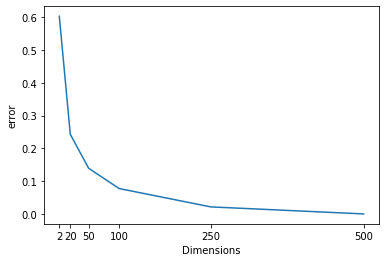

In [8]:
#for i in range(len(error)):
plt.plot(pca_values,error)
plt.xticks(pca_values)
plt.xlabel('Dimensions')
plt.ylabel('error')

### Decide "N" such that error is 20%

#### reducing to 28 dimension we get 20% error

In [9]:
e=np.sum(eigen_values[:28])/np.sum(eigen_values)
print(1-e.real)

0.20310728139125833


Labels of images

In [10]:
path="./dataset"
files=os.listdir(path)
labels=[int(i.split("_")[0]) for i in files]
labels=np.array(labels)
print(labels.shape)

(520,)


## Reduce to 1-Dimension

Reduce images to 1-D

In [11]:
reduce_eigen_vectors,reduce_data=reduce_dimen(standardized_data,eigen_vectors,1)
reduce_data=reduce_data.real
print(reduce_data.shape)

(520, 1)


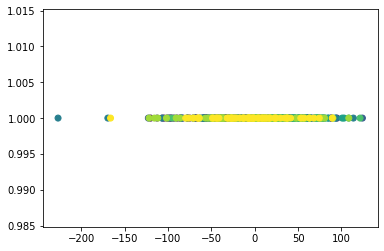

In [12]:
plt.scatter(reduce_data[:,0],520*[1],c=labels)
plt.show()

## Reduce to 2-Dimension

Reduce images to 2-D

In [13]:
reduce_eigen_vectors,reduce_data=reduce_dimen(standardized_data,eigen_vectors,2)
reduce_data=reduce_data.real
print(reduce_data.shape)

(520, 2)


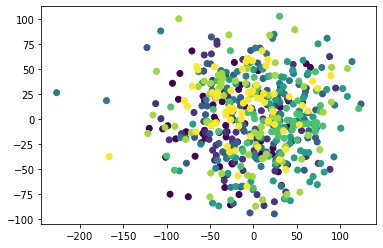

In [14]:
plt.scatter(reduce_data[:,0],reduce_data[:,1],c=labels)
plt.show()

# Reduce to 3-Dimension

Reduce images to 3-D

In [15]:
reduce_eigen_vectors,reduce_data=reduce_dimen(standardized_data,eigen_vectors,3)
reduce_data=reduce_data.real
print(reduce_data.shape)

(520, 3)


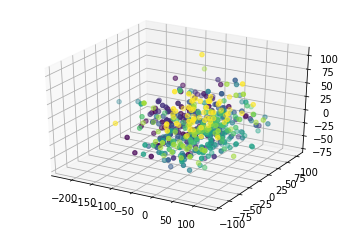

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduce_data[:,0],reduce_data[:,1],reduce_data[:,2],c=labels)


In [17]:
!jupyter nbconvert --to html q1.ipynb

[NbConvertApp] Converting notebook q1.ipynb to html
[NbConvertApp] Writing 465550 bytes to q1.html
